In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('StudentsPerformance.csv')

df['Average_Score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['Status'] = 0
df.loc[df['Average_Score'] >= 40, 'Status'] = 1

X = df.drop(['math score', 'reading score', 'writing score', 'Average_Score', 'Status'], axis=1)
y = df['Status']

X = pd.get_dummies(X)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

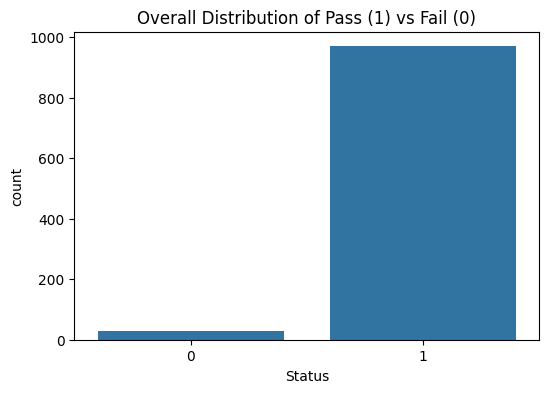

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=df)
plt.title('Overall Distribution of Pass (1) vs Fail (0)')
plt.show()

In [7]:
model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    random_state=42
)

model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

Final Model Accuracy: 97.00%


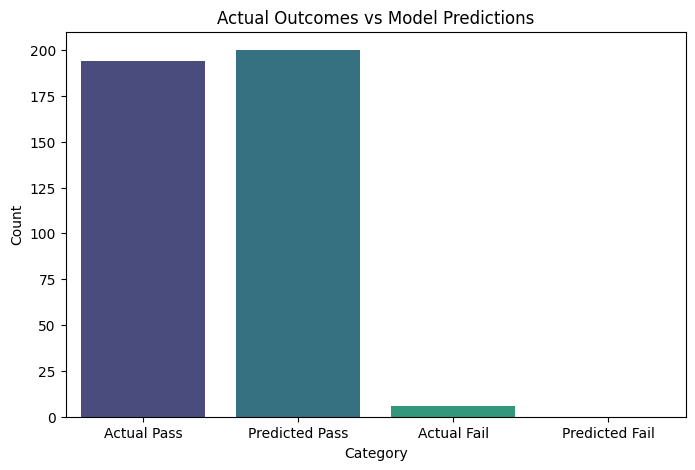

In [8]:
val_preds = model.predict(X_val)
acc = accuracy_score(y_val, val_preds)

print(f"Final Model Accuracy: {acc * 100:.2f}%")

comparison_df = pd.DataFrame({
    'Category': ['Actual Pass', 'Predicted Pass', 'Actual Fail', 'Predicted Fail'],
    'Count': [sum(y_val == 1), sum(val_preds == 1), sum(y_val == 0), sum(val_preds == 0)]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Count', data=comparison_df, hue='Category', palette='viridis', legend=False)
plt.title('Actual Outcomes vs Model Predictions')
plt.show()

In [9]:

model.save_model('student_performance_model.json')


print("Model Columns:")
print(X.columns.tolist())

Model Columns:
['gender_female', 'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E', "parental level of education_associate's degree", "parental level of education_bachelor's degree", 'parental level of education_high school', "parental level of education_master's degree", 'parental level of education_some college', 'parental level of education_some high school', 'lunch_free/reduced', 'lunch_standard', 'test preparation course_completed', 'test preparation course_none']
